In [3]:
%matplotlib inline

In [14]:
## http://pymatgen.org/modules.html

import pymatgen as mg

API_key="MTF9psiegrAP0BmZ"

In [24]:
## http://pymatgen.org/pymatgen.ext.matproj.html
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    # Structure for material id
    id = "mp-1234"
    data = m.get_data(id)
    print(data)
    with open(id+'.txt', 'w') as f:
        f.write(str(data))

[{'energy': -26.94573468, 'energy_per_atom': -4.49095578, 'volume': 116.92375473740876, 'formation_energy_per_atom': -0.4835973866666663, 'nsites': 6, 'unit_cell_formula': {'Al': 4.0, 'Lu': 2.0}, 'pretty_formula': 'LuAl2', 'is_hubbard': False, 'elements': ['Al', 'Lu'], 'nelements': 2, 'e_above_hull': 0, 'hubbards': {}, 'is_compatible': True, 'spacegroup': {'source': 'spglib', 'symbol': 'Fd-3m', 'number': 227, 'point_group': 'm-3m', 'crystal_system': 'cubic', 'hall': 'F 4d 2 3 -1d'}, 'task_ids': ['mp-940234', 'mp-925833', 'mp-940654', 'mp-1234'], 'band_gap': 0.0, 'density': 6.502482433523648, 'icsd_id': None, 'icsd_ids': [608375, 57958, 608376, 608372, 608371, 608370], 'cif': "# generated using pymatgen\ndata_LuAl2\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   5.48873905\n_cell_length_b   5.48873905\n_cell_length_c   5.48873905\n_cell_angle_alpha   60.00000005\n_cell_angle_beta   60.00000003\n_cell_angle_gamma   60.00000007\n_symmetry_Int_Tables_number   1\n_chemical_formula

number of bands 34
True
False
{<Spin.up: 1>: array([[-20.727 , -20.7272, -20.7278, ..., -20.7699, -20.7696, -20.7695],
       [-20.727 , -20.7272, -20.7278, ..., -20.7691, -20.7694, -20.7695],
       [-20.727 , -20.7268, -20.7263, ..., -20.6418, -20.6409, -20.6406],
       ...,
       [ 14.5186,  14.4926,  14.4131, ...,  13.5619,  13.5513,  13.5579],
       [ 14.5249,  14.5289,  14.5529, ...,  14.1814,  14.3733,  14.5643],
       [ 14.551 ,  14.5415,  14.6012, ...,  14.6471,  14.6501,  14.608 ]])}
(34, 171)
[3.1603 3.1008 3.001  2.899  2.8001 2.7058 2.6164 2.5321 2.453  2.379
 2.3102 2.2464 2.1876 2.1337 2.0846 2.0402 2.0004 1.9651 1.9342 1.9077
 1.8854 1.8672 1.8531 1.8431 1.8371 1.8352 1.8352 1.7474 1.6165 1.4871
 1.3644 1.2502 1.1458 1.0523 0.9707 0.9021 0.8475 0.8079 0.7837 0.7756
 0.7756 0.8546 0.9537 1.0712 1.2044 1.3503 1.5046 1.6596 1.7958 1.8592
 1.8592 1.8683 1.8797 1.8937 1.9108 1.9311 1.955  1.9828 2.0147 2.0509
 2.0918 2.1373 2.1878 2.2431 2.3035 2.3687 2.4388 2.5134 2.592

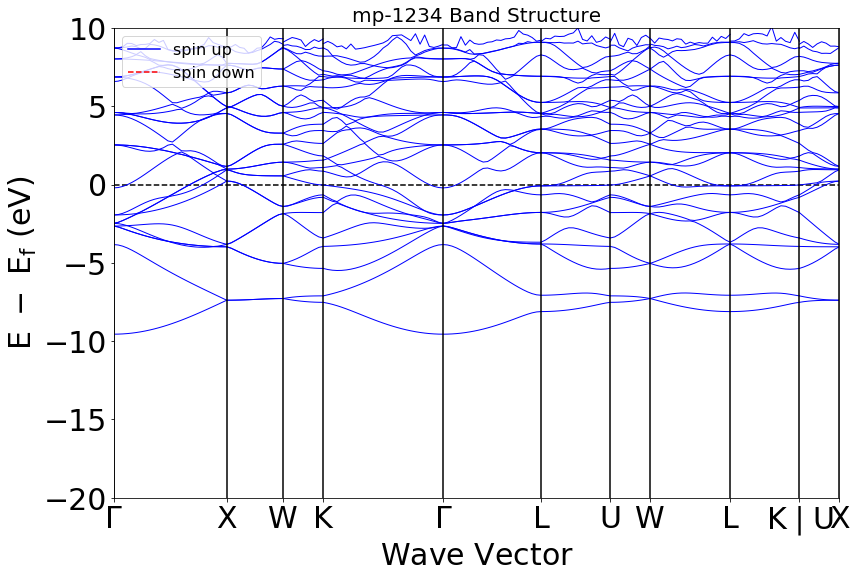

In [35]:
from pymatgen import MPRester
from pymatgen import Spin
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter
import matplotlib.pyplot as plt

with mg.MPRester(API_key) as m:
    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-1234")
    print(bandstructure)
    print("number of bands", bandstructure.nb_bands)
    print(bandstructure.is_metal())
    print(bandstructure.is_spin_polarized)

    # BaandStructure物件有個bands的性質，儲存所有的能帶結構，他的shape是(dictionnary of arrays)
    # {Spin.up: np.array((nb_bands, nb_kpoints)), Spin.down: np.array((nb_bands, nb_kpoints))}
    print(bandstructure.bands)
    print(bandstructure.bands[Spin.up].shape)
    # The 9th bands of spin up
    print(bandstructure.bands[Spin.up][9, :])
    
    bsplot = BSPlotter(bandstructure)
    # get the plot
    bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
    print(bandstructure.efermi)
    # add some features
    ax = plt.gca()
    ax.set_title("mp-1234 Band Structure", fontsize=20)
    xlim = ax.get_xlim()
    ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

    # add legend
    ax.plot((), (), "b-", label="spin up")
    ax.plot((), (), "r--", label="spin down")
    ax.legend(fontsize=16, loc="upper left")

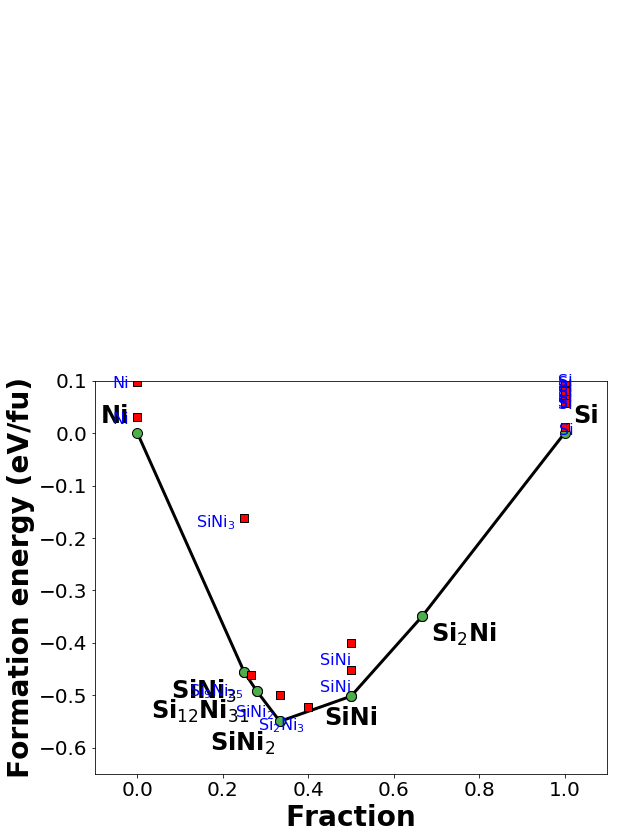

In [13]:
from pymatgen import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

#This initializes the REST adaptor. Put your own API key in.

with mg.MPRester(API_key) as m: 
#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the chemical system.
    entries = m.get_entries_in_chemsys(['Ni', 'Si'])

#With entries, you can do many sophisticated analyses, 
#like creating phase diagrams.
    pd = PhaseDiagram(entries)
    plotter = PDPlotter(pd, show_unstable=True)
    plotter.show() 

In [18]:
import pymatgen as mg

symbol = "Si"
elm = mg.Element(symbol)
print(elm.atomic_mass)
print(elm.atomic_radius)
print(elm.melting_point)
elec_structure = elm.full_electronic_structure
print(elec_structure)

28.0855 amu
1.1 ang
1687.0 K
[(1, 's', 2), (2, 's', 2), (2, 'p', 6), (3, 's', 2), (3, 'p', 2)]


In [19]:
import pymatgen as mg

comp = mg.Composition("Fe2O3")
print(comp.weight)
print(comp.get_atomic_fraction("Fe"))

159.6882 amu
0.4


In [37]:
import pymatgen as mg

# http://pymatgen.org/pymatgen.core.structure.html?highlight=structure#module-pymatgen.core.structure
lattice = mg.Lattice.cubic(4.2)
structure = mg.Structure(lattice, ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
print(structure.volume)
structure.to(fmt="poscar")
structure.to(filename="POSCAR")
structure.to(filename="CsCl.cif")

# You can create a Structure using spacegroup symmetry as well.
li2o = mg.Structure.from_spacegroup("Fm-3m", mg.Lattice.cubic(3), ["Li", "O"], [[0.25, 0.25, 0.25], [0, 0, 0]])

74.08800000000001
